Obs.: I had to trim down the notebook (images and output) due to Kaggle's 1MB kernel size limitation. Please see [video](https://www.youtube.com/watch?v=Wuer_v__Ryg) for detailed explanation.

Kaggle Utility Scripts Dependencies:
- [gemini-duo2](https://www.kaggle.com/code/felixthecat/gemini-duo2): Core Gemini Duo functionalities
- [gemini-tts](https://www.kaggle.com/code/felixthecat/gemini-duo-tts): Gemini Duo Text-to-speech module
- [gemini_duo_content](https://www.kaggle.com/code/felixthecat/gemini-duo-content): Gemini Duo content parsing module


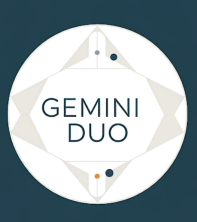

# Gemini Duo

Welcome to Gemini Duo, your AI-powered teaching companion designed to transform the way you learn. As a Harvard student, I've been exploring its capabilities, and I'm excited to share my journey with you. Gemini Duo leverages long-context windows to handle extensive knowledge bases, enabling deep and meaningful conversations. Let's dive into how it can revolutionize your study sessions!

## Key Features
- **Make Sense of Large Knowledge Bases**: Effortlessly process and maintain context across extensive reading lists leveraging long-context windows and context caching.
- **Conversational-Based Learning**: Engage with content through dynamic question-and-answer sessions leveraging Gemini's prompt engineering capabilities.
- **Enhanced Transparency**: Add citations to source materials providing verifiable references and build trust in the system's outputs.
- **Grounded Research**: Perform research based on real-time information leveraging Gemini's grounding capapabilities
- **Structured Output**: Generate Output in JSON object leveraging Gemini's structured output capabilities to enable downstream integration

## Use Case

### Description

As a Harvard student enrolled in GOV 1039 "The Birth of Modern Democracy," I face a daunting reading list for next Tuesday's class on Rights. The readings include foundational documents like the Magna Carta, Declaration of Independence, and US Bill of Rights, each with specific sections to analyze.

Instead of trudging through these dense historical texts sequentially, I want to:
- Extract key insights and connections between these documents.
- Engage with the material through an interactive Q&A format.
- Identify the most important concepts and themes.
- Discuss and clarify complex points with an AI teaching companion.
- Create a memorable learning experience that aids retention.

### How Long Context Windows Enable This Use Case

Gemini Duo's ability to handle long-context windows is a game-changer for this use case. By maintaining context across multiple documents, the model can draw parallels and provide comprehensive insights. This capability allows for a seamless integration of new content without losing the context of previously ingested material, making the learning process more cohesive and efficient.

### Sources
- Harvard Class: [GOV 1039 Syllabus](https://scholar.harvard.edu/files/dlcammack/files/gov_1039_syllabus.pdf)
- Topics: Rights

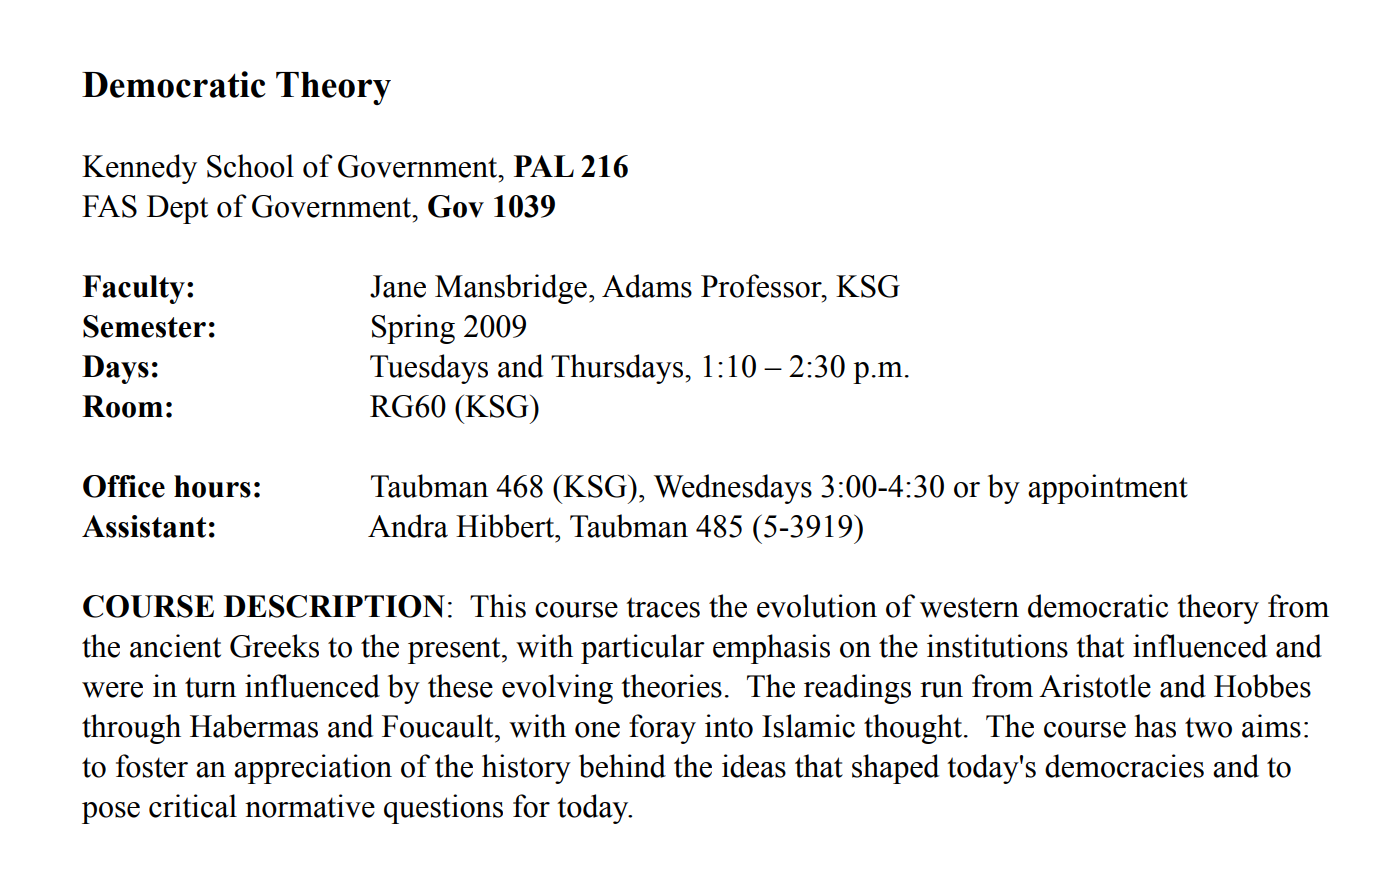

### Working Example

#### Knowledge Base

Let's start by loading our knowledge base. I'm amazed at how Gemini Duo can handle such a large amount of data!

- ID 1. The Declaration of Independence of the United States of America
- ID 2. The United States Bill of Rights
- ID 3. John F. Kennedy's Inaugural Address
- ID 4. Lincoln's Gettysburg Address
- ID 5. The United States Constitution
- ID 6. Give Me Liberty or Give Me Death
- ID 7. The Mayflower Compact
- ID 8. Abraham Lincoln's Second Inaugural Address
- ID 9. Abraham Lincoln's First Inaugural Address
- 
Let's start by loading our knowledge base. I'm amazed at how Gemini Duo can handle such a large amount of data!





### Package dependencies

In [ ]:
%pip install -q -U requests beautifulsoup4 pymupdf pyyaml langchain-google-genai langchain-core langchain google-cloud-texttospeech pydub

In [3]:
%pip install -q -U 'google-generativeai>=0.8.3'

Note: you may need to restart the kernel to use updated packages.


In [6]:
import gemini_duo_content
import gemini_duo_tts
import gemini_duo2 as genai_duo
from IPython.display import Markdown, display

**IMPORTANT**: Here we set audio generation to false due to Kaggle's kernel 1MB limitation. 
When running the notebook feel free to set it to TRUE.

In [5]:
AUDIO_GENERATION = False

Gemini Duo can handle very large knowledge bases thanks to its long-context capabilities, loading over 100K tokens from our reading list!

In [7]:
kb = [f"https://www.gutenberg.org/cache/epub/{i}/pg{i}.txt" for i in range(1,9)]

In [8]:
duo = genai_duo.Client(knowledge_base=kb)

/opt/conda/lib/python3.10/site-packages/langsmith/client.py:241: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


### Interactive Q&A

Now, let's simulate a conversation with a professor and student focused on the reading list. This is where Gemini Duo shines!

In [9]:
rights_response = duo.qa("Give me an overview of the history of 'Rights' in the U.S.A.", transcript_only= not AUDIO_GENERATION)


prompt_token_count: 122530
candidates_token_count: 988
total_token_count: 123518
cached_content_token_count: 61811



Listen to sample [audio here](https://www.kaggle.com/datasets/felixthecat/sample-duo-audio?select=1.wav).

In [ ]:
# rights_response[0] returns the response in TTS format
# rights_response[1] returns the conversation in audio format
# rights_response[2] returns the response in JSON format


It's like Gemini Duo brings content to life! So engaging!
Add structured output Gemini capability.
The output is formatted as a JSON object, containing both the text response and text-to-speech formatting instructions, enabling downstream audio generation.

In [10]:
import json
print(json.dumps(rights_response[2], indent=2))

[
  {
    "person1": "<Person1><prosody rate=\"1.15\" pitch=\"-3st\">The concept of 'rights' in the US is really fascinating! It's like a building, you know, with layers added over time.</prosody></Person1>",
    "person2": "<Person2><prosody rate=\"1.05\">Absolutely! And a solid foundation is key. <break time=\"0.1s\"/>The Declaration of Independence really set the stage, didn't it?</prosody></Person2>"
  },
  {
    "person1": "<Person1>Definitely. <prosody rate=\"1.1\">\"Life, Liberty, and the pursuit of Happiness.\" <break time=\"0.18s\"/> It's powerful stuff, even today!</prosody> But, uh, those rights weren't equally applied at the time, were they?</Person1>",
    "person2": "<Person2><prosody pitch=\"-1st\">Sadly, no. <break time=\"0.1s\"/>Slavery was a glaring contradiction. And women were largely excluded from political life. <break time=\"0.1s\"/> It took decades and hard-fought battles to even inch towards true equality.</prosody></Person2>"
  },
  {
    "person1": "<Person1>

### Adding New Content

What if I want to add more references? I am sure "The Magna Carta" will be discussed in class. No problem! Gemini Duo's context caching ensures that adding new content doesn't "break" the LLM while avoiding unnecessary added costs since the reading list has been cached!

In [11]:
study_references = ["https://www.gutenberg.org/cache/epub/10000/pg10000.txt", "https://www.gutenberg.org/cache/epub/65363/pg65363.txt"]

In [12]:
duo.add([study_references[0]])

In [13]:
magna_response1 = duo.qa("Help me understand Magna Carta", transcript_only= not AUDIO_GENERATION)

prompt_token_count: 82631
candidates_token_count: 841
total_token_count: 83472
cached_content_token_count: 61811



Listen to sample [audio here](https://www.kaggle.com/datasets/felixthecat/sample-duo-audio?select=2.wav).

In [14]:
duo.add([study_references[1]])

In [16]:
magna_response2 = duo.qa("William Sharp McKechnie on Magna Carta", transcript_only= not AUDIO_GENERATION)

prompt_token_count: 383819
candidates_token_count: 968
total_token_count: 384787
cached_content_token_count: 61811



In this request alone, Gemini managed to process close to 400K tokens in its long-context window, that's about 300K words.

### Grounded Research

I really enjoyed William Sharp McKechnie's take on Magna Carta. But who was he? Gemini Duo has a particular feature that enables research of an input topic leveraging Gemini's grounding capabilities, which performs factual research based on real-time Google web search function calling!

In [ ]:
research_response = duo.research("Who was William Sharp McKechnie?")
print(research_response[0])

### Recap and Quiz
After all this learning, it's time to recap and test my knowledge with a quiz. Gemini Duo makes it easy!


In [ ]:
#recap
recap_response = duo.recap()
print(recap_response[0])

In [ ]:
quiz_response_citations = duo.quiz(add_citations=True)
display(Markdown(quiz_response_citations))

Sample Quiz with Citations marked in Yellow:

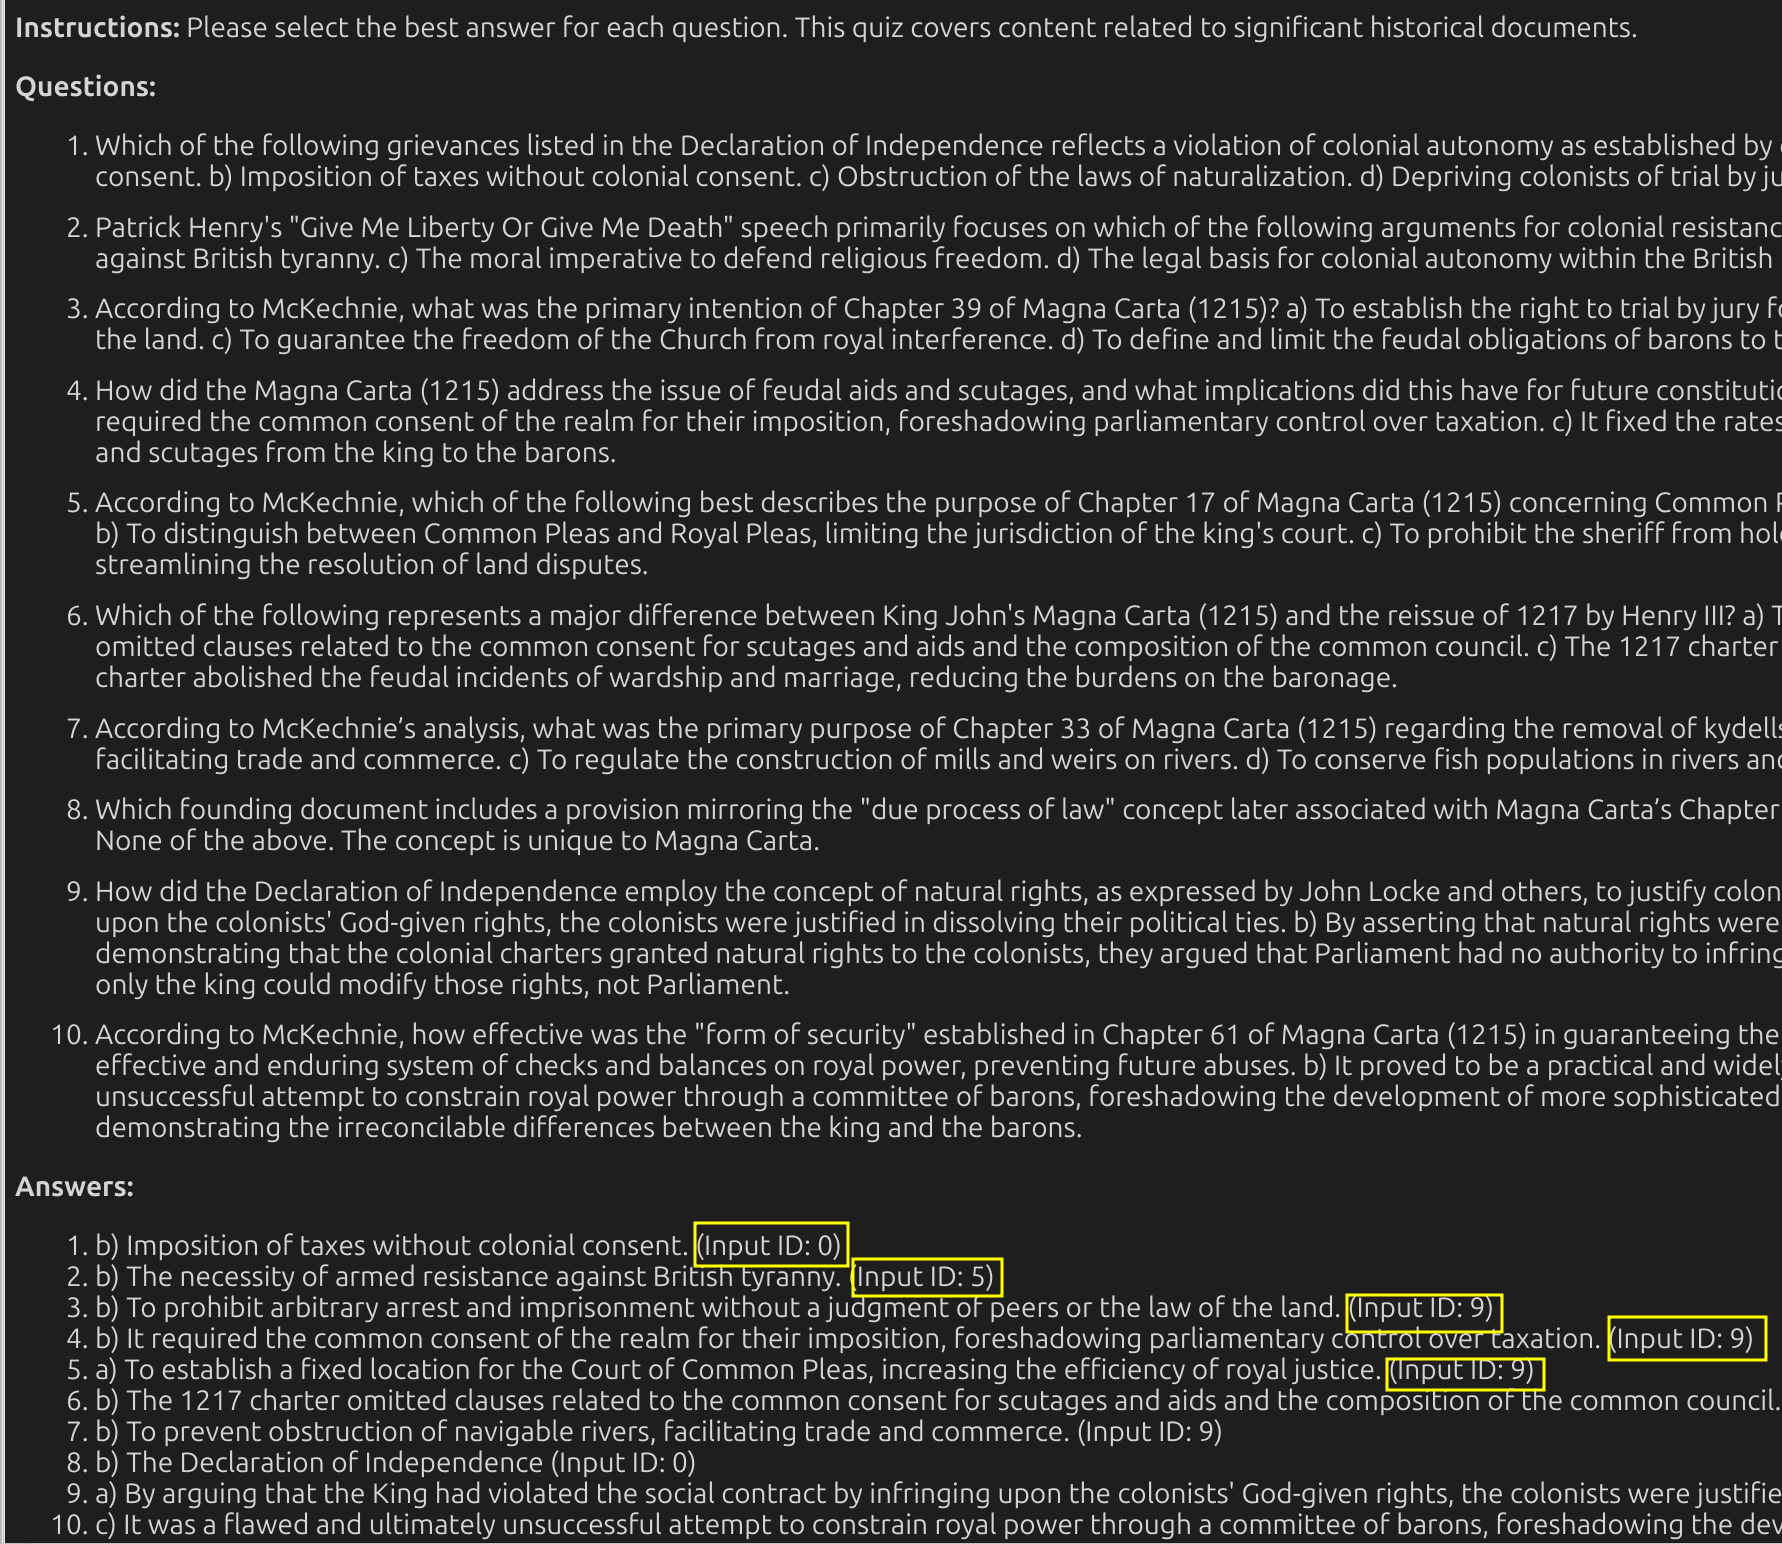

That is amazing! With Duo I can simulate potential questions and answers for the class! 
But how can we trust the output? Gemini Duo provides citations back to the source material!
Yes, with every Duo conversation, you can request citations to be added to the output!
Duo leverages Corpus-in-Context Prompting (pronoucned "seek") to add citations back to the source 
material! We can observe the input IDs added to the quiz answers above!

That's so smart! It really helps me trust the output given the added transparency!



### Discussion and Conclusion

Gemini Duo provides a novel and efficient approach to learning by leveraging long-context windows and context caching. It offers a unique, engaging, and informative experience, making it an invaluable tool for students and educators alike. As a Harvard student, I'm thrilled to have discovered such a powerful ally in my academic journey!

## Limitations
- **Source Material Quality**: The system's responses are only as good as the source materials provided. Low-quality or biased sources may lead to less reliable outputs.
- **Citation Granularity**: While citations are provided, currently they are given at the resource level rather than specific passages.
- **Language Support**: Currently optimized primarily for English content
- **Output Length**: The output length is limited by the model's output token max length.

## Future Work
- **Expanded Language Support**: Enhancing multilingual capabilities to better serve global users.
- **Improved Citation Precision**: Developing more granular citation mechanisms to point to specific quotes and passages.
- **Cross-Document Analysis**: Strengthening the ability to draw connections across multiple source materials.
- **Customizable Learning Paths**: Creating personalized learning experiences based on user preferences and goals.
- **Accessibility Features**: Implementing tools to make the system more accessible to users with different needs.




